# Logistic Regression from scratch

#### Implementing Logistic Regression from scratch using just loops 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = np.array([
    [22, 2.5],
    [25, 3.0],
    [28, 3.5],
    [30, 4.0],
    [32, 5.0],
    [35, 6.0],
    [40, 7.0],
    [45, 8.5]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1])


(8, 2)

#### Making Sigmoid Function 

In [24]:
def Sigmoid(z):

    g = 1 / (1 + np.exp(-z))

    return g

#### Checking Sigmoid Function with input value 0

In [ ]:
print('sigmod of value 0: ', Sigmoid(0))        ### Should print 0.5 if correct 

sigmod of value 0:  0.5


#### Plot for Data Visualization (Shows linear structure)

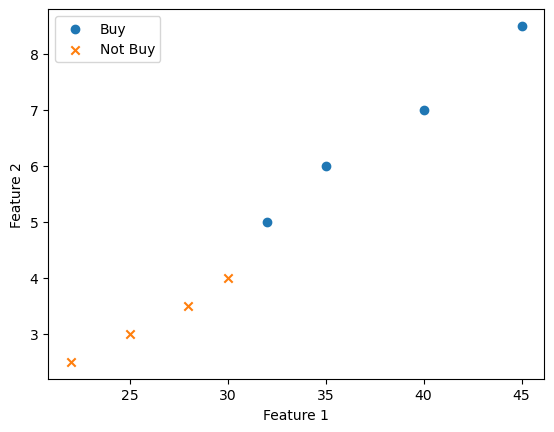

In [38]:
y = y.ravel()

pos = y == 1
neg = y == 0

plt.scatter(X[pos, 0], X[pos, 1], marker='o', label='Buy')
plt.scatter(X[neg, 0], X[neg, 1], marker='x', label='Not Buy')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#### Computing Loss Function

In [ ]:
def loss(X,y,w,b):
    m, n = X.shape

    cost = 0
    for i in range(m):
        z = np.dot(w, X[i]) + b    ### Function 
        q = Sigmoid(z)

        loss = (-y[i] * np.log(q)) - (1 - y[i]) * (np.log(1 - q))   ## Loss function for Logistic Regression with Sigmoid

        cost = cost + loss

    
    total_cost = cost / m           ## Performing Summation 



    return total_cost

#### Testing Loss function with Keeping W and B parameters as Zeros

In [45]:
m, n = X.shape
Try_W = np.zeros(n)
Try_b = 0

cost = loss(X,y,Try_W, Try_b)
print('{:.3f}'.format(cost))

0.693


### Gradient for Logistic Regression


In [55]:
def Gradient(X, y, w, b):           ### Basically we are calculating the change in loss with respect to all the parameters that are W and b , this gives us magnitude and direction of that change of loss -----> With this we can later tell how the parameters must be updated to minimize the loss (Gradient Descent)
    m, n = X.shape
    d_dw = np.zeros(w.shape)
    d_db = 0

    for i in range(m):
        z_wb = np.dot(w, X[i]) + b
        g_wb = Sigmoid(z_wb)

        d_db = d_db + g_wb - y[i]

        for j in range(n):
            d_dw[j] = d_dw[j] + (g_wb - y[i]) * X[i][j]    ## Keeping this is a second loop as W is a vector and is dependent of X(Feature) so it needs to cover all the fetures present that is 'n' which is 2 in this case 

    d_db /= m           ## Taking the average as we did the same during the calculation of Loss to so it keeps the gradient stable if we do this here too
    d_dw /= m

    return d_dw, d_db

### Testing For Zero values of W and B 

In [57]:
Try_w = np.zeros(n)
Try_b = 0

d_dw, d_db = Gradient(X,y, Try_w, Try_b)
print(d_db)
print(d_dw)

0.0
[-2.9375  -0.84375]


## Performing Gradient Descent

In [ ]:
def Gradient_descent(X,y, w, b, loss, gradient, alpha, num_iters):
    m = len(X)

    J_history = []
    W_history = []

    for i in range(num_iters):
        
        

